In [20]:
import time
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Measure Runtime for both options: 'scatter' and 'convert'

In [21]:
def measure_runtime(command):
    start_time = time.time()
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    end_time = time.time()
    runtime = end_time - start_time
    return runtime, result.stdout, result.stderr

In [22]:
input_files = [
    ("./Chow_Rep1.genes.results", "./Chow_Rep2.genes.results"),
    ("./Chow_Rep2.genes.results", "./Chow_Rep3.genes.results"),
    ("./Chow_Rep3.genes.results", "./Chow_Rep1.genes.results"),
    ("./HFD_Rep1.genes.results", "./HFD_Rep2.genes.results"),
    ("./HFD_Rep2.genes.results", "./HFD_Rep3.genes.results"),
    ("./HFD_Rep3.genes.results", "./HFD_Rep1.genes.results")
]

In [23]:
commands = {
    "scatter_plot": "quantgene scatter {file1} {file2} ./",
    "convert_fpkm_to_tpm": "quantgene convert {file1} ./"
}


In [24]:
def calculate_average_runtime(commands, file_pairs):
    runtimes = []
    for file1, file2 in file_pairs:
        command = commands.format(file1=file1, file2=file2)
        print(f"Measuring runtime for files: {file1}, {file2}")
        runtime, stdout, stderr = measure_runtime(command)
        if stderr:
            print(f"Errors for files {file1}, {file2}:\n{stderr}")
        else:
            runtimes.append(runtime)
    average_runtime = np.mean(runtimes)
    return average_runtime, runtimes

In [25]:
average_runtimes = {}
all_runtimes = {}

for name, command in commands.items():
    print(f"Calculating average runtime for {name}...")
    avg_runtime, runtimes = calculate_average_runtime(command, input_files)
    average_runtimes[name] = avg_runtime
    all_runtimes[name] = runtimes
    print(f"Average runtime for {name}: {avg_runtime:.2f} seconds")

Calculating average runtime for scatter_plot...
Measuring runtime for files: ./Chow_Rep1.genes.results, ./Chow_Rep2.genes.results
Measuring runtime for files: ./Chow_Rep2.genes.results, ./Chow_Rep3.genes.results
Measuring runtime for files: ./Chow_Rep3.genes.results, ./Chow_Rep1.genes.results
Measuring runtime for files: ./HFD_Rep1.genes.results, ./HFD_Rep2.genes.results
Measuring runtime for files: ./HFD_Rep2.genes.results, ./HFD_Rep3.genes.results
Measuring runtime for files: ./HFD_Rep3.genes.results, ./HFD_Rep1.genes.results
Average runtime for scatter_plot: 0.81 seconds
Calculating average runtime for convert_fpkm_to_tpm...
Measuring runtime for files: ./Chow_Rep1.genes.results, ./Chow_Rep2.genes.results
Measuring runtime for files: ./Chow_Rep2.genes.results, ./Chow_Rep3.genes.results
Measuring runtime for files: ./Chow_Rep3.genes.results, ./Chow_Rep1.genes.results
Measuring runtime for files: ./HFD_Rep1.genes.results, ./HFD_Rep2.genes.results
Measuring runtime for files: ./HFD_Rep

## Get the Average Runtime 

In [26]:
average_runtime_df = pd.DataFrame(list(average_runtimes.items()), columns=['Task', 'Average Runtime'])

## Visualize the Average Runtime in both options (s)

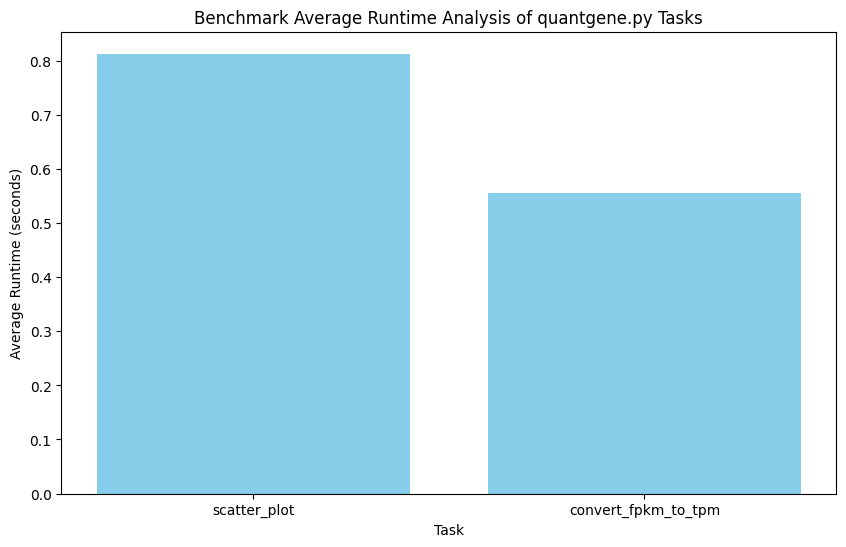

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(average_runtime_df['Task'], average_runtime_df['Average Runtime'], color='skyblue')
plt.xlabel('Task')
plt.ylabel('Average Runtime (seconds)')
plt.title('Benchmark Average Runtime Analysis of quantgene.py Tasks')

# Save the plot as a PNG file
plt.savefig('bench_avg_runtime_analysis.png')

plt.show()

### Get Dataframe of Average Runtime 

In [28]:
average_runtime_df

,Task,Average Runtime
0,scatter_plot,0.812976
1,convert_fpkm_to_tpm,0.556107
